<a href="https://colab.research.google.com/github/MonkeyWrenchGang/MGTPython/blob/main/module_8/8_5_OpticalCharacterRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optical Character Recognition


---

Reading text from images! Optical Character Recognition (OCR) is the process of electronically recognizing text in images and converting it into machine-readable text. There are several libraries available in Python for OCR we are going to leverage EasyOCR. 

Here is the recipe


1. Change runtime to GPU 
  `Runtime > Change runtime type > Hardware Accelerator > GPU` - this is optional but will make things faster! 

2. Install easyocr package
  ```
  !pip install easyocr
  ```
3. Download sample images with text 
  - this will create a directory images_w_text with several sample images

4. Extract the text from the image  
 


# 2. Install EasyOCR


---

EasyOCR is a Python library for Optical Character Recognition (OCR) that aims to be the most accurate OCR library available. It is designed to be easy to use, with a simple interface that allows users to recognize text from images with just a few lines of code. EasyOCR is open-source and can be installed easily using pip.

One of the main features of EasyOCR is its ability to recognize text in multiple languages. It currently supports over 70 languages, including several Asian languages such as Chinese, Japanese, and Korean. It also has a feature called "language detection," which allows it to automatically detect the language of the text in an image.

Another feature of EasyOCR is its ability to recognize text in different orientations and fonts. It uses a **deep learning model** that has been trained on a large dataset of images to achieve high accuracy even on challenging images. EasyOCR also has a built-in post-processing step that can correct common errors and improve the accuracy of the recognized text.

> EasyOCR was created by Jaided AI, a startup founded by a team of computer vision researchers and engineers. The team has expertise in deep learning, computer vision, and natural language processing, and has developed several other open-source projects in addition to EasyOCR, including EasyPR (a license plate recognition library) and EasyFace (a face recognition library).

In [1]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Load Libraries


---



In [37]:
# import libraries 
import requests
import zipfile
import os 

# import the OCR library
import easyocr

# image stuff 
from PIL import Image, ImageDraw, ImageFont, ImageFilter, ImageOps, ImageEnhance
from google.colab.patches import cv2_imshow

# 3. Download Sample Images

In [3]:
# set the URL of the ZIP file on GitHub
url = "https://github.com/MonkeyWrenchGang/MGTPython/blob/main/module_8/img/Module8ImageText.zip?raw=true"
# send a GET request to the URL and save the content to a local file
response = requests.get(url)
filename = "Module8ImageText.zip"
with open(filename, "wb") as f:
    f.write(response.content)

# extract the contents of the ZIP file to a directory
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('.')

print("-- downloaded images check your 'images_w_text' directory --")

-- downloaded images check your 'images_w_text' directory --


## View an Image


---



Original image size: 1015 571
Resized image size: 922 519


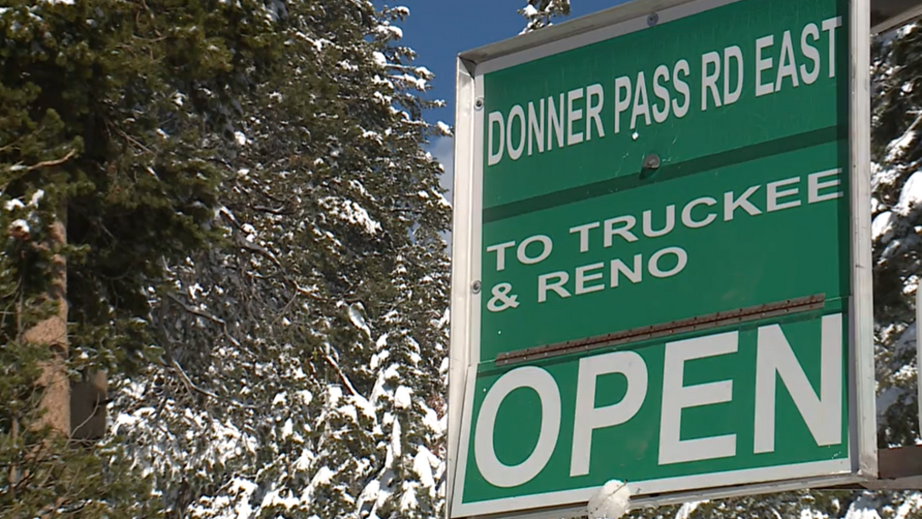

In [46]:
# Define the URL of the image file on GitHub
image_file = "/content/images_w_text/donnerpass.png"

# open an image 
image = Image.open(image_file)

# Get the original size of the image
width, height = image.size
print("Original image size:", width, height)

# Resize the image to half its original size
new_size = (int(width/1.1), int(height/1.1))
resized_image = image.resize(new_size)

new_width, new_height = resized_image.size
print("Resized image size:", new_width, new_height)

# Display the image in the Colab notebook
display(resized_image)




# 4. Extract Text



---

The result of using EasyOCR is a list of tuples, where each tuple represents a word or a group of words recognized from the input image. Each tuple contains four elements: the coordinates of the bounding box around the word(s), the recognized text, the confidence score of the recognition, and the information about the paragraph and line where the word(s) are located. Here is an example of what the output might look like:


In [47]:
# perform OCR using EasyOCR
reader = easyocr.Reader(['en'])
result = reader.readtext(image_file)
print("extracted {} peices of TEXT!".format(len(result)))

extracted 10 peices of TEXT!


In [48]:
result

[([[763, 45], [829, 45], [829, 127], [763, 127]], 'RD', 0.9718383058701122),
 ([[531, 305], [577, 305], [577, 347], [531, 347]], '&', 0.9710146717354083),
 ([[809.508351558737, 29.28591170256884],
   [934.30322937638, -0.22574256076491217],
   [950.491648441263, 93.71408829743116],
   [824.69677062362, 123.22574256076491]],
  'EAST',
  0.8483703136444092),
 ([[650.2678711470553, 76.34469747351551],
   [766.7924652694467, 44.34769304963345],
   [785.7321288529447, 136.6553025264845],
   [669.2075347305533, 168.65230695036655]],
  ' PASSt',
  0.4229442872484867),
 ([[513.0999260471713, 110.42975595566526],
   [673.5473049489414, 73.43965031361249],
   [688.9000739528287, 162.57024404433474],
   [528.4526950510586, 199.56034968638753]],
  'JDONNER |',
  0.33392263406549477),
 ([[616.6076433315133, 236.49757966248058],
   [929.6303833903318, 173.92664935964132],
   [935.3923566684867, 224.50242033751942],
   [622.3696166096682, 287.0733506403587]],
  'TRUCKEE',
  0.9986692295153963),
 ([[3

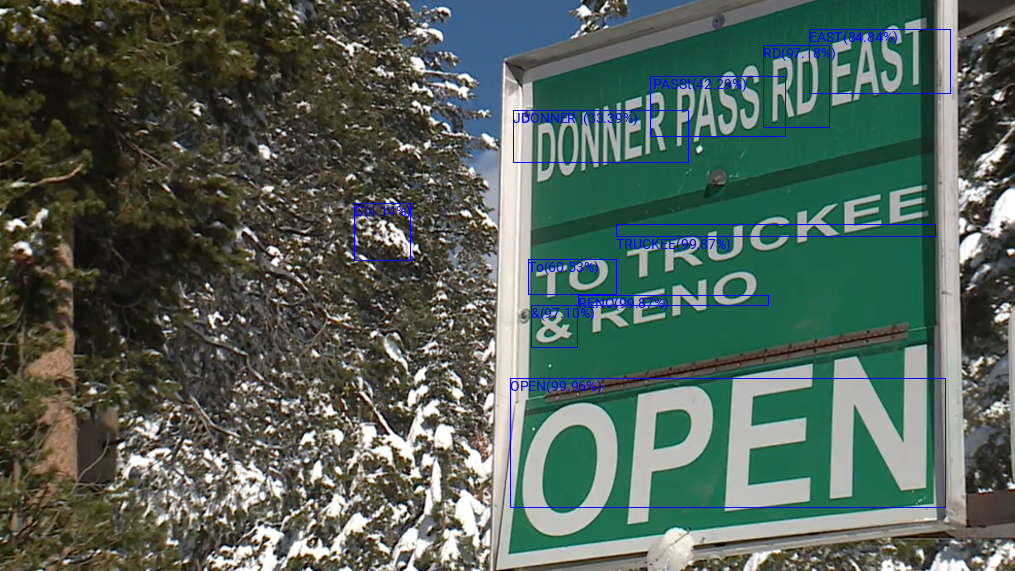

In [49]:
# Create a Draw object
draw = ImageDraw.Draw(image)

# Load a font for the text
font = ImageFont.truetype("/content/images_w_text/Roboto-Regular.ttf", 14)

# Iterate over the results and draw a rectangle around each word
for (bbox, text, prob) in result:

    # Define the bounding box coordinates
    bbox_coords = tuple(map(int, (bbox[0][0], bbox[0][1], bbox[2][0], bbox[2][1])))

    # draw a rectangle around the text
    draw.rectangle(bbox_coords, outline="blue")
    
    # Draw the text and probability on the image
    extracted_text = "{}({:.2f}%)".format(text, prob*100)
    draw.text(bbox_coords, extracted_text, font=font, fill='blue')
   
# Show the output image
image.show()